# Melodia: A Python Library for Protein Structure and Dynamics Analysis

## Structure Similarity Analysis

In [1]:
import warnings

import dill

import numpy as np
import pandas as pd
import melodia as mel
import seaborn as sns
import matplotlib.pyplot as plt

from os import path
from math import sqrt

from sklearn.preprocessing import StandardScaler

from Bio.PDB.PDBExceptions import PDBConstructionWarning


from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering

In [2]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, 
                                      model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [3]:
warnings.filterwarnings("ignore", category=PDBConstructionWarning)

### Parser an alignment in the PIR file format

In [4]:
# Dill can be used for storage
if path.exists('model.dill'):
    with open('model.dill', 'rb') as file:
        align = dill.load(file)
else:
    align = mel.parser_pir_file('model.ali')
    with open('model.dill', 'wb') as file:
        dill.dump(align, file)

In [5]:
data = []
id2pos = {}
for pos, record in enumerate(align):
    if 'structure' in record.description:
        id2pos[record.id] = pos
        for pair in zip(record.letter_annotations['curvature'], record.letter_annotations['torsion']):
            data.append(list(pair))
        record.letter_annotations['cluster'] = [0 for i in range(len(record.seq))]
        
scaler = StandardScaler()
scaler.fit(data);

In [13]:
i = 0
xy = []
tags = []
for id, pos in id2pos.items():
    record = align[pos]
    if record.seq[i] != '-':
        xy.append([record.letter_annotations['curvature'][i], record.letter_annotations['torsion'][i]])
        tags.append(id)
    
xy = scaler.transform(xy)

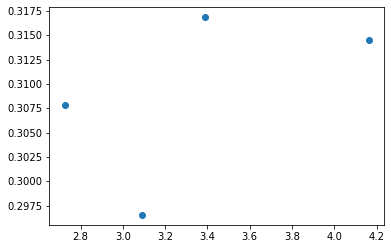

In [14]:
plt.scatter([i[0] for i in xy], [i[1] for i in xy]);

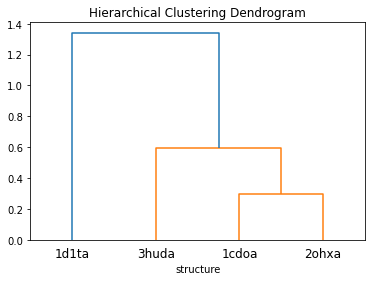

In [15]:
def llf(xx):
    return f'{tags[xx]}'

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(xy)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3, leaf_label_func=llf)
plt.xlabel('structure')
plt.show()

In [16]:
clustering = AgglomerativeClustering(distance_threshold=0.7, n_clusters=None)

In [17]:
for i in range(align.get_alignment_length()):
    xy = []
    tags = []
    for id, pos in id2pos.items():
        record = align[pos]
        if record.seq[i] != '-':
            xy.append([record.letter_annotations['curvature'][i], record.letter_annotations['torsion'][i]])
            tags.append(id)

    xy = scaler.transform(xy)

    clusters = clustering.fit_predict(xy)

    map_of_clusters = {pair[0]: pair[1]+1 for pair in zip(tags, clusters)}

    for id, pos in id2pos.items():
        record = align[pos]
        if id in map_of_clusters:
            record.letter_annotations['cluster'][i] = map_of_clusters[id]
            # print(id, record.letter_annotations['cluster'][i])

In [18]:
record = align[0]

In [19]:
print(id, record.letter_annotations['cluster'])

3huda [1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 3, 2, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 2, 3, 3, 3, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 0, 2, 4, 5, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 1, 3, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 